In [31]:
from pathlib import Path

import numpy as np
import pyvista as pv
from aicsimageio import AICSImage
from desmin_reconstruction.plotting.renderings import (
    render_boundingsquare,
)
from desmin_reconstruction.preprocessing.bbox import BoundingSquare


pv.set_jupyter_backend("static")

datadir = Path("../data/SIM/actin")

In [8]:
img = AICSImage(datadir / "Image 4A- FED LatticeSIM.czi")

In [52]:
img.__dict__

{'_reader': <CziReader [Image-is-in-Memory: True]>,
 '_reconstruct_mosaic': True,
 '_xarray_dask_data': <xarray.DataArray 'array-c14aed590adf5c263ad3f8646b14c80e' (T: 1, C: 3, Z: 57,
                                                             Y: 2560, X: 2560)> Size: 2GB
 dask.array<array, shape=(1, 3, 57, 2560, 2560), dtype=uint16, chunksize=(1, 3, 57, 626, 626), chunktype=numpy.ndarray>
 Coordinates:
   * C        (C) <U9 108B 'TV1-T1-SR' 'TV1-T2-SR' 'TV2-T3-SR'
   * Z        (Z) float64 456B 0.0 0.1096 0.2191 0.3287 ... 5.916 6.025 6.135
   * Y        (Y) float64 20kB 0.0 0.0313 0.06261 0.09391 ... 80.04 80.07 80.1
   * X        (X) float64 20kB 0.0 0.0313 0.06261 0.09391 ... 80.04 80.07 80.1
 Dimensions without coordinates: T
 Attributes:
     unprocessed:  <Element 'ImageDocument' at 0x14cc9b6bcae0>,
 '_xarray_data': <xarray.DataArray (T: 1, C: 3, Z: 57, Y: 2560, X: 2560)> Size: 2GB
 array([[[[[    0,     0,     0, ...,     0,     0,     0],
           [    0,     0,     0, ..., 

In [9]:
img_data = img.get_image_data("CXYZ", T=0)
pixel_sizes = (
    img.physical_pixel_sizes.X,
    img.physical_pixel_sizes.Y,
    img.physical_pixel_sizes.Z,
)

In [24]:
grids = []
for img_channel in img_data:
    grid = pv.ImageData(dimensions=np.array(img_channel.shape) + 1, spacing=pixel_sizes)
    grid.cell_data["data"] = (
        img_channel.flatten(order="F") / np.iinfo(img_data.dtype).max
    )
    grids.append(grid)

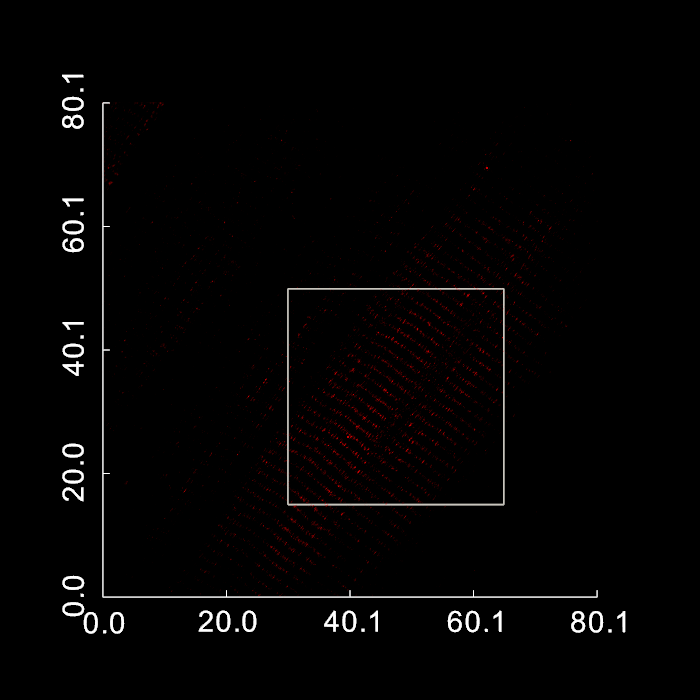

In [56]:
pl = pv.Plotter(notebook=True, window_size=(700, 700))
actor = pl.add_volume(
    grids[0],
    cmap=["#FF0000"],
    opacity=[0.0, 0.1, 0.8],
    clim=(0, 0.3),
    blending="maximum",
    show_scalar_bar=False,
)
actor.prop.interpolation_type = "linear"
# actor = pl.add_volume(
#     grid2,
#     cmap=["#00FFFF"],
#     opacity=[0.0, 0.1, 0.8],
#     clim=(0, 0.2),
#     # opacity_unit_distance=1.5,
#     blending="maximum",
#     show_scalar_bar=False,
# )
# actor.prop.interpolation_type = "linear"
pl.set_background(color="black")
pl.enable_parallel_projection()

pl.view_xy()
axis = pl.show_bounds(
    color="white",
    # axes_ranges=[0, 16, 0, 16, 0, 0],
    grid=None,
    bold=False,
    font_size=22,
    font_family="arial",
    padding=0.0,
    use_3d_text=False,
    show_zaxis=False,
    xtitle="",
    ytitle="",
)
bbox = BoundingSquare(30, 15, 35)
pl = render_boundingsquare(pl, bbox, z_height=4.0)
pl.show()
# pl.save_graphic("../figures/fig_2/2e/myosin.svg")

In [41]:
type(img_channel)

numpy.ndarray

In [43]:
x_slice

(958.0, 2077.0)

In [65]:
x_slice = slice(int(bbox.x0 // pixel_sizes[0]), int(bbox.x1 // pixel_sizes[0] + 1))
y_slice = slice(int(bbox.y0 // pixel_sizes[1]), int(bbox.y1 // pixel_sizes[1] + 1))

grids_subset = []
for img_channel in img_data:
    img_subset = img_channel[x_slice, y_slice]
    grid = pv.ImageData(
        dimensions=np.array(img_subset.shape) + 1,
        spacing=pixel_sizes,
        # origin=(bbox.x0, bbox.y0, 0),
    )
    grid.cell_data["data"] = (
        img_subset.flatten(order="F") / np.iinfo(img_data.dtype).max
    )
    grids_subset.append(grid)

2025-11-16 23:52:37.218 (3679.403s) [    14CD42C92740] vtkEGLRenderWindow.cxx:674   WARN| vtkEGLRenderWindow (0x14b40ac8d590): Unable to eglMakeCurrent: 12291
2025-11-16 23:52:37.373 (3679.557s) [    14CD42C92740] vtkEGLRenderWindow.cxx:674   WARN| vtkEGLRenderWindow (0x14c830296510): Unable to eglMakeCurrent: 12291
2025-11-16 23:52:51.608 (3693.792s) [    14CD42C92740] vtkEGLRenderWindow.cxx:674   WARN| vtkEGLRenderWindow (0x14b40ac8d590): Unable to eglMakeCurrent: 12291


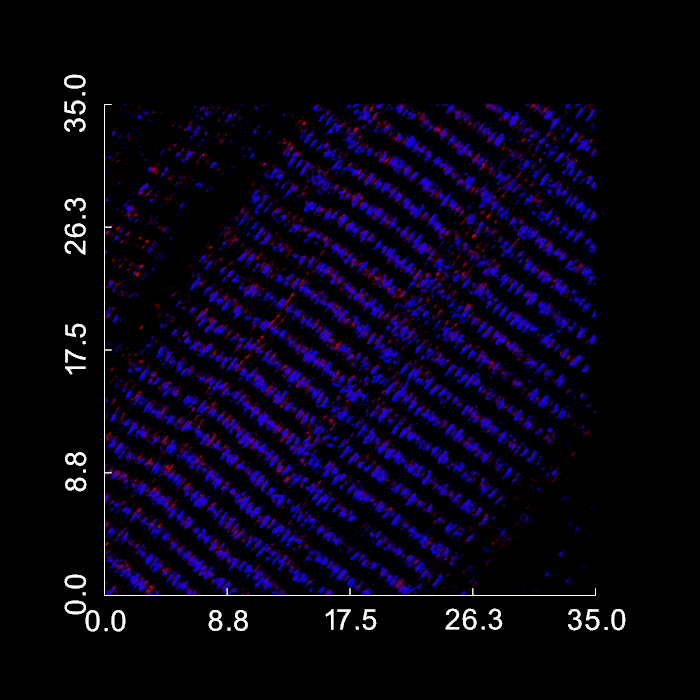

In [73]:
pl = pv.Plotter(notebook=True, window_size=(700, 700))
actor = pl.add_volume(
    grids_subset[0],
    cmap=["#FF0000"],
    opacity=[0.0, 0.1, 0.8],
    clim=(0, 0.2),
    blending="maximum",
    show_scalar_bar=False,
)
actor.prop.interpolation_type = "linear"
actor = pl.add_volume(
    grids_subset[1],
    cmap=["#0000FF"],
    opacity=[0.0, 0.1, 0.8],
    clim=(0, 0.2),
    # opacity_unit_distance=1.5,
    blending="maximum",
    show_scalar_bar=False,
)
actor.prop.interpolation_type = "linear"
pl.set_background(color="black")
pl.enable_parallel_projection()

pl.view_xy()
axis = pl.show_bounds(
    color="white",
    # axes_ranges=[0, 16, 0, 16, 0, 0],
    grid=None,
    bold=False,
    font_size=22,
    font_family="arial",
    padding=0.0,
    use_3d_text=False,
    show_zaxis=False,
    xtitle="",
    ytitle="",
    ztitle="",
)
pl.show()
pl.save_graphic("../figures/fig_4/4a/overlay.svg")